##Importación de Datos

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#para escalar datos
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [33]:
filename=('/content/drive/MyDrive/Coding Dojo/Track1/Week 2/proyecto2/sales_predictions.csv')
df=pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Diccionrio de base de datos
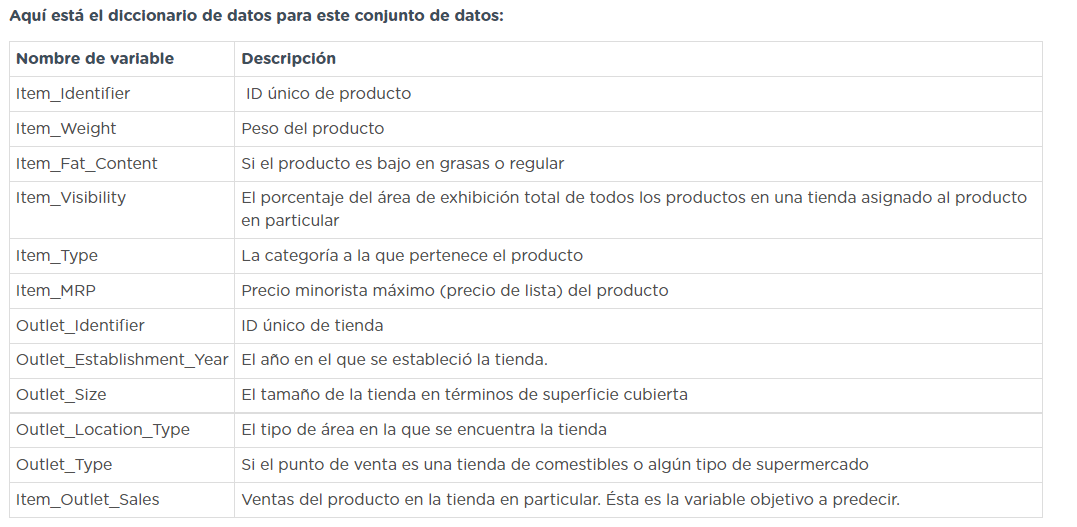

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Exploración de Informacion 

In [35]:
df['Item_Weight']=df.loc[:,'Item_Weight'].interpolate(method='linear')
df['Outlet_Size']=df.loc[:,'Outlet_Size'].fillna(method='ffill')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#Vizualizaciones 

##Diagrama de pastel 

In [37]:
#filtro 
ventas_producto= df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()
ventas_producto;

In [38]:
type(ventas_producto)

pandas.core.series.Series

In [39]:
ventas_produto=np.array(ventas_producto)
ventas_produto

array([ 339.82850046, 2316.18114811, 1995.49873922, 3694.03855765])

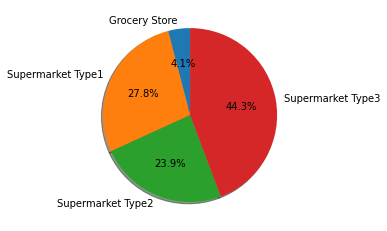

In [40]:
plt.pie(ventas_producto.values,labels=ventas_producto.index,
        autopct='%1.1f%%', shadow=True, startangle=90);
plt.show()

##histograma Gauseano 

distribucion de los precion de los productos

In [41]:
ventas=df['Item_MRP']
ventas;

Text(0.5, 1.0, 'PRICE MINORIST DISTRIBUTION')

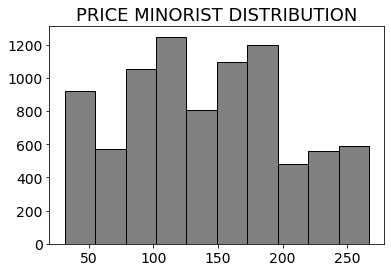

In [63]:
plt.hist(ventas.values,bins=10,edgecolor='black', color = 'gray');
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('PRICE MINORIST DISTRIBUTION', 
          fontsize = 18)

In [71]:
#histograma para ver el numero de productos segun el tipo de tienda 
tienda= df.groupby(['Outlet_Type'])['Item_Visibility'].sum()

tienda

Outlet_Type
Grocery Store        113.565873
Supermarket Type1    338.651189
Supermarket Type2     56.621454
Supermarket Type3     54.804764
Name: Item_Visibility, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


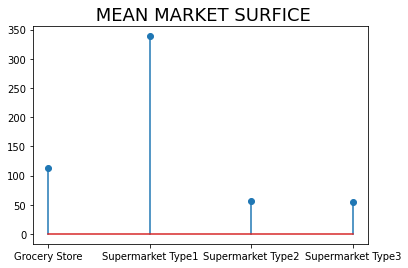

In [70]:
plt.stem(tienda.index,tienda.values)


AttributeError: ignored

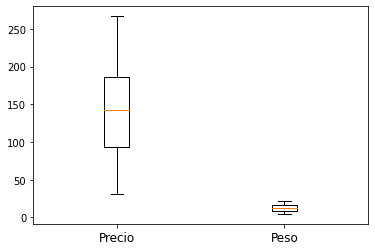

In [73]:
#diagrama de bigotes del peso de los productos, donde se encuentran los productos mas pesados frente a sus precios 
precio=df['Item_MRP'].values
peso= df['Item_Weight'].values
plt.boxplot([precio,peso], labels=['Precio', 'Peso']);
plt.xticks(fontsize = 12)
plt.ytitle('Peso de Producto')
plt.yticks(fontsize = 12)
plt.title('PROPORCIONALISDAD DE PRECIO Y PESO', 
          fontsize = 18);
#Conclusion no existen ninguna proporcionalidad


##Prediccion de regresion lineaL


In [46]:
X=df.loc[:,['Item_Weight','Item_Visibility','Item_MRP']]
X.shape

(8523, 3)

In [47]:
type(X)

pandas.core.frame.DataFrame

In [48]:
y=df.loc[:,'Item_Outlet_Sales'].values
y.shape

(8523,)

In [49]:
type(y)

numpy.ndarray

In [50]:
#estandarizacion
knn= KNeighborsRegressor(n_neighbors=2)
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [51]:
prediccion=knn.predict(X)
score=knn.score(X,y)
score

0.6541175121198957

In [74]:
prediccion

array([4855.6794,  468.0574, 1258.362 , ..., 1470.4193, 2563.33  ,
       1888.8746])

Text(0.5, 1.0, 'PRICE MINORIST DISTRIBUTION  RL')

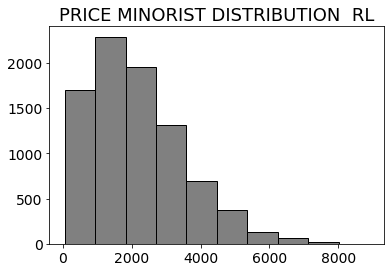

In [97]:
plt.hist(prediccion,bins=10,edgecolor='black', color = 'gray');
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('PRICE MINORIST DISTRIBUTION  RL', 
          fontsize = 18)

#Random forest 

In [52]:
from sklearn.model_selection import train_test_split
# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [53]:
#matriz de caracteristicas
X=df.loc[:,['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
#vector objetivo 
y=df.loc[:,'Item_Outlet_Sales'].values

In [54]:
#validacion de datos , division entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [92]:
#crear instancia para el modelo
clf = RandomForestRegressor(n_estimators=200,
                            bootstrap=True,
                            oob_score=True)
clf

RandomForestRegressor(n_estimators=200, oob_score=True)

In [93]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [94]:
predicc=clf.predict(X_test[0:15])

In [95]:
score = clf.score(X_test, y_test)
score

0.40621151824286916

Text(0.5, 1.0, 'PRICE MINORIST DISTRIBUTION RF')

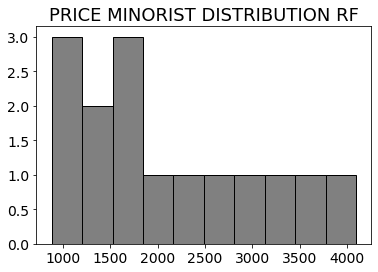

In [98]:
plt.hist(predicc,bins=10,edgecolor='black', color = 'gray');
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('PRICE MINORIST DISTRIBUTION RF', 
          fontsize = 18)